In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

sets = pd.read_csv('data/sets.csv.gz', 
                compression='gzip',
                header=0, 
                sep=',', 
                quotechar='"', 
                on_bad_lines='skip')

## Database exploration

In [19]:
print(f"Number of entries in the dataset: {sets.shape[0]} rows")
print(f"Number of columns in the dataset: {sets.shape[1]} columns")

Number of entries in the dataset: 21942 rows
Number of columns in the dataset: 6 columns


In [20]:
print(sets.info())
print(sets.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21942 entries, 0 to 21941
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    21942 non-null  object
 1   name       21942 non-null  object
 2   year       21942 non-null  int64 
 3   theme_id   21942 non-null  int64 
 4   num_parts  21942 non-null  int64 
 5   img_url    21942 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.0+ MB
None
               year      theme_id     num_parts
count  21942.000000  21942.000000  21942.000000
mean    2007.794549    442.211694    160.984049
std       13.958032    215.411281    417.637181
min     1949.000000      1.000000      0.000000
25%     2001.000000    273.000000      2.000000
50%     2012.000000    497.000000     30.000000
75%     2018.000000    608.000000    139.000000
max     2024.000000    752.000000  11695.000000


In [21]:
max_pieces_bool = sets['num_parts'] == sets['num_parts'].max()
max_pieces_set = sets.loc[max_pieces_bool].iloc[0]
print(f"Set name with the most pieces: {max_pieces_set['name']} "
      f"with {max_pieces_set['num_parts']} parts from {max_pieces_set['year']}")

print(f"Year range in the dataset: {sets.year.min()} - {sets.year.max()}")
print(f"Number of unique set names: {sets['name'].nunique()}")
print(f"Number of themes: {sets['theme_id'].nunique()}")

set_names = sets['name'].value_counts()
print(f"Number of sets with unique names: {len(set_names[set_names == 1])}")
print(f"Number of sets with repetitive names: {len(set_names[set_names > 1])}")

most_frequent_theme_id = sets['theme_id'].idxmax()

print(f"Id of most frequent theme: {most_frequent_theme_id}")

Set name with the most pieces: World Map with 11695 parts from 2021
Year range in the dataset: 1949 - 2024
Number of unique set names: 18809
Number of themes: 461
Number of sets with unique names: 17281
Number of sets with repetitive names: 1528
Id of most frequent theme: 15983


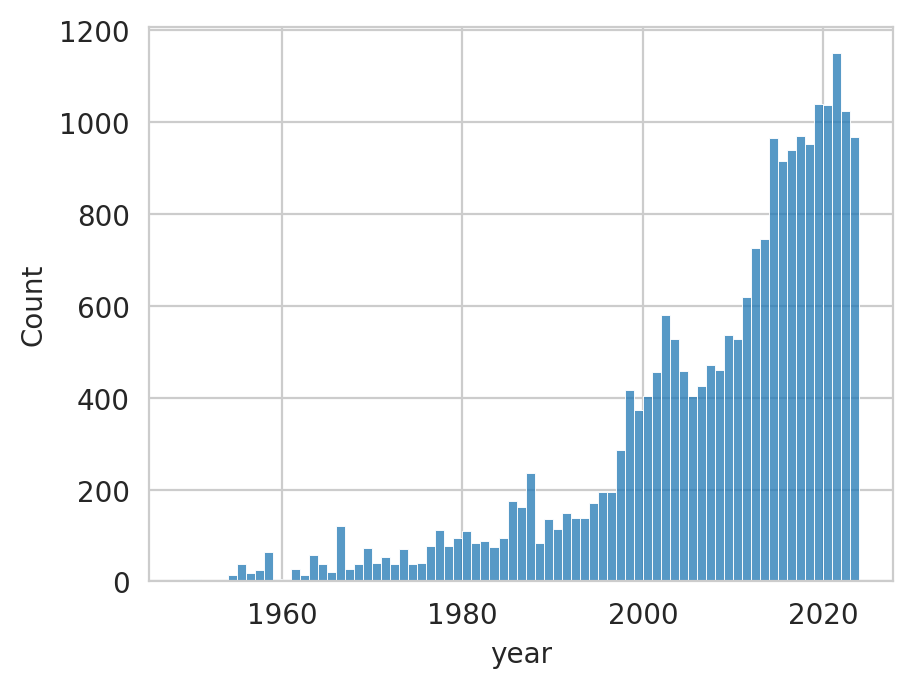

In [22]:
sns.histplot(data=sets, x='year', binwidth=1)
plt.show()

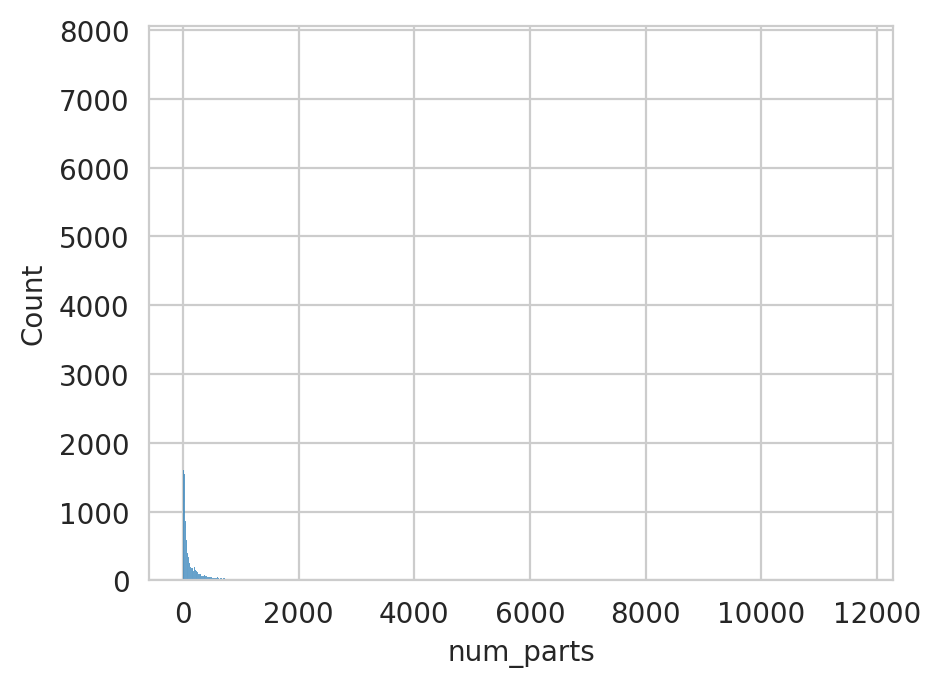

In [23]:
sns.histplot(data=sets, x='num_parts')
plt.show()

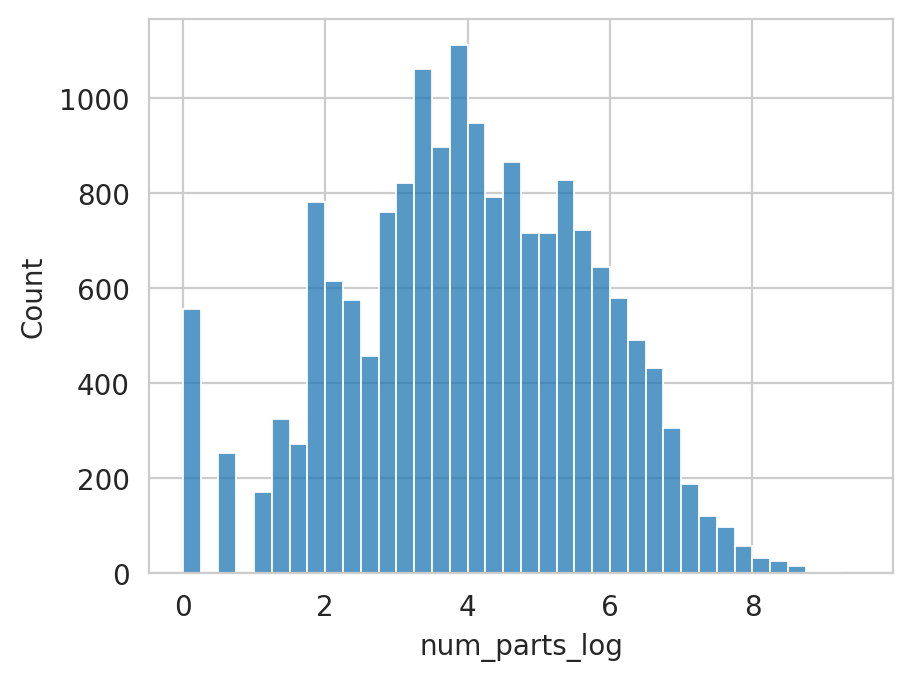

In [24]:
sets['num_parts_log'] = sets['num_parts'].apply(np.log)

sns.histplot(data=sets, x='num_parts_log', binwidth=0.25)
plt.show()

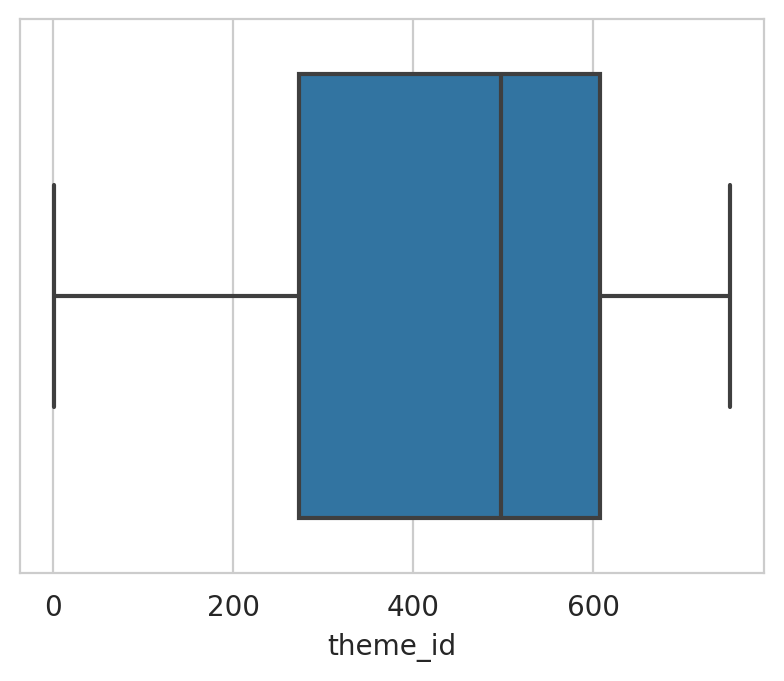

In [25]:
sns.boxplot(data=sets, x='theme_id')
plt.show()

## Correlation analysis

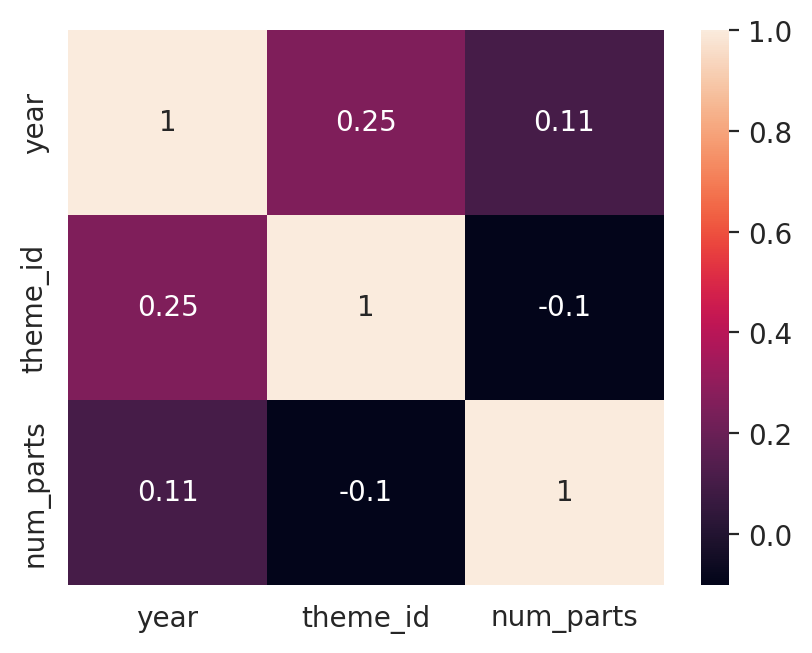

In [26]:
sns.heatmap(data=sets[['year', 'theme_id', 'num_parts']].corr(), annot=True)
plt.show()

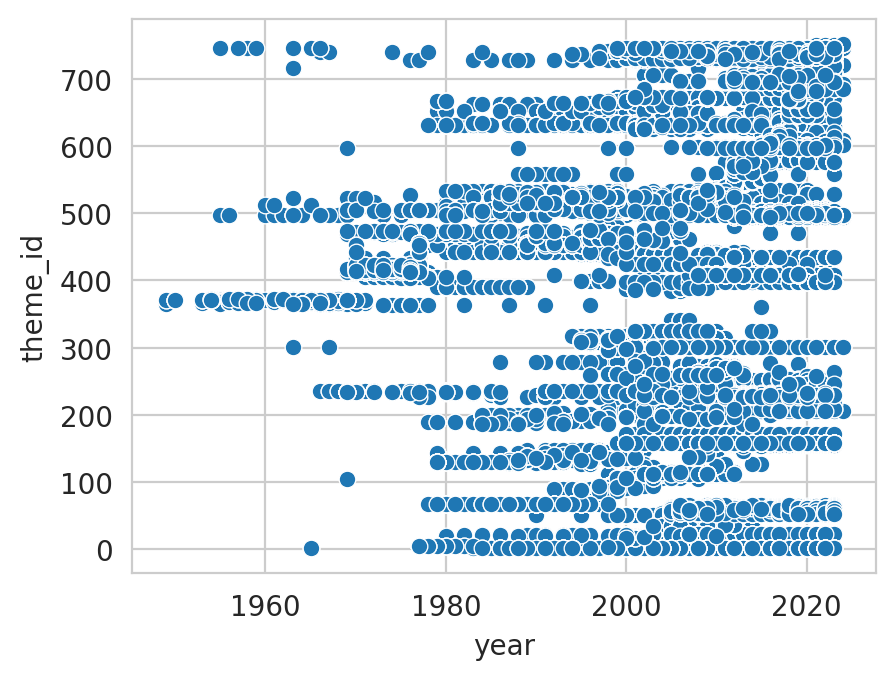

In [27]:
sns.scatterplot(data=sets,
                x='year',
                y='theme_id')
plt.show()

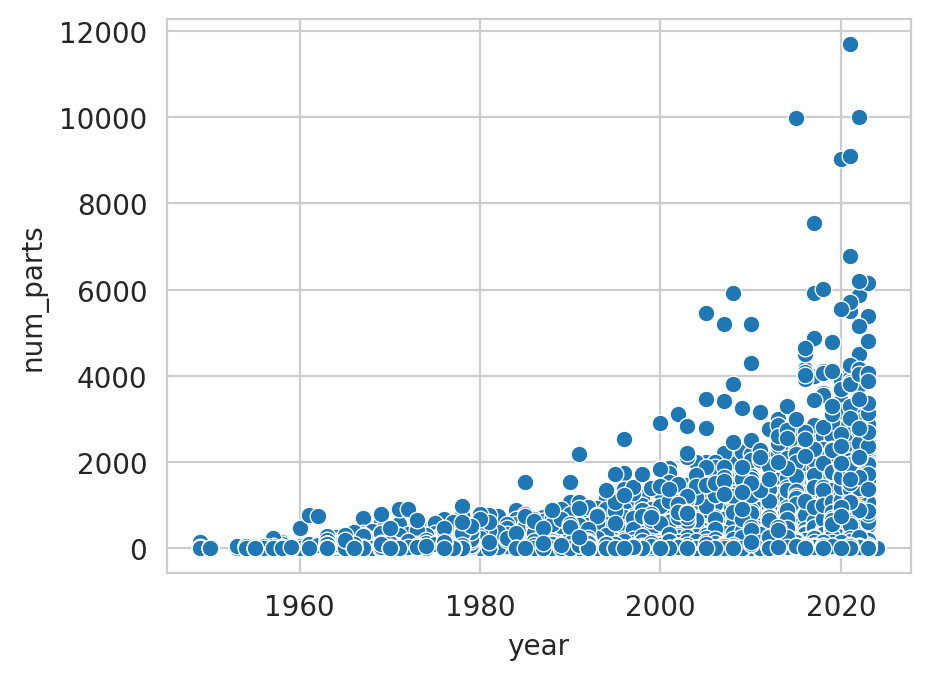

In [28]:
sns.scatterplot(data=sets,
                x='year',
                y='num_parts')
plt.show()